<a href="https://colab.research.google.com/github/IgorKolesov/CIFAR10/blob/main/model_cifar10_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Явно указываем необходимость загрузки второй версии tf

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Загрузка библиотек

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Загружаем датасет

In [39]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

Приводим данные к нужному типу

In [40]:
train_x = train_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255
test_x = test_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 1) uint8
(10000, 1) uint8


Посмотрим, как выглядят изображения

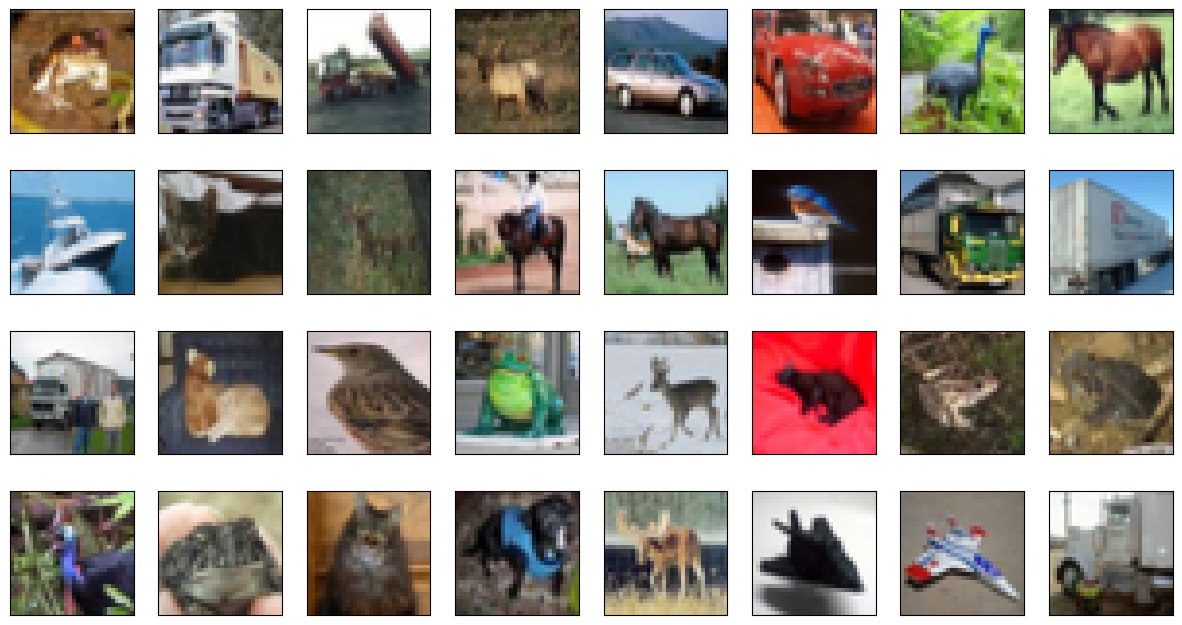

In [41]:
some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(15,8))
for i in range(some_samples.shape[0]):
  ax = fig.add_subplot(4, 8, i+1)
  ax.imshow(some_samples[i, :, :, :])
  plt.xticks([]), plt.yticks([])

plt.show()

Создаем простую keras модель

In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

Подготовка модели к обучению

In [72]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Обучение модели

In [73]:
NUM_EPOCHS = 20

model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/20
1563/1563 [==============================] - 9s 4ms/step - loss: 1.3736 - accuracy: 0.5023
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9436 - accuracy: 0.6687
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7761 - accuracy: 0.7288
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6580 - accuracy: 0.7687
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5602 - accuracy: 0.8026
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4727 - accuracy: 0.8346
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3914 - accuracy: 0.8615
Epoch 8/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3244 - accuracy: 0.8850
Epoch 9/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2707 - accuracy: 0.9032
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.216

Оценка качества модели

In [74]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 4ms/step - loss: 1.7785 - accuracy: 0.7348


[1.778517723083496, 0.7347999811172485]

Сохраним обученную модель

In [76]:
 model.save("cifar10-model-v10.keras")

Пример инференса

In [79]:
loaded_model = tf.keras.models.load_model("cifar10-model-v10.keras")

check = test_x[0, ...]
prediction = loaded_model(check[None, ...])[0]
print(prediction)

tf.Tensor(
[2.4273820e-07 1.6135682e-09 4.9874448e-08 8.7096691e-01 6.5288119e-10
 1.2843351e-01 5.9558923e-04 6.2384782e-07 7.3454224e-08 3.0030892e-06], shape=(10,), dtype=float32)


Функция для отображения результата

In [108]:
categories = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}


def test_image(sample):
  prediction = loaded_model(sample[None, ...])[0]
  ans = np.argmax(prediction)

  fig = plt.figure(figsize=(12,4))

  ax = fig.add_subplot(1,2,1)
  ax.imshow(sample)
  plt.xticks([]), plt.yticks([])

  ax = fig.add_subplot(1,2,2)
  bars = ax.bar(np.arange(10), prediction, align='center')
  bars[ans].set_color('g')
  ax.set_xticks(np.arange(10))
  ax.set_xlim([-1, 10])
  ax.grid(True)

  plt.show()

  print(f'Prediction: {categories[ans]}')

Пример работы

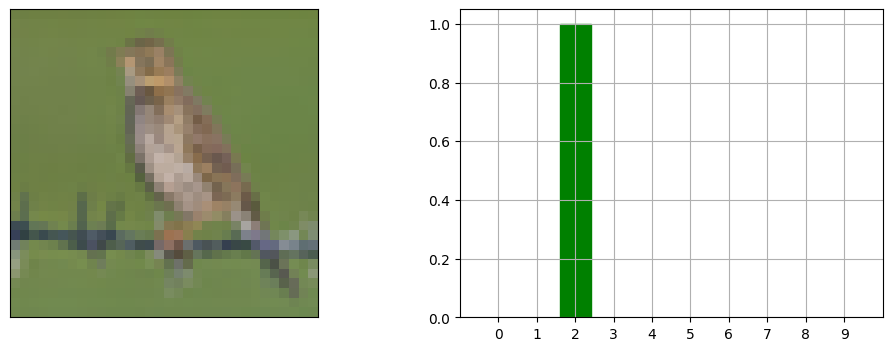

Prediction: bird


In [119]:
import random

idx = random.randint(0, test_x.shape[0])
test_image(test_x[idx, ...])

Тестируем произвольное изображение

In [120]:
import imageio
from skimage.transform import resize

def load_and_prepare_img(path_to_img):
  img = imageio.imread(path_to_img, pilmode='RGB')
  img = img.astype(np.float32) / 255
  img = resize(img, (32,32), order=3, mode='reflect', anti_aliasing=True)

  return img

<ipython-input-120-771d0ed3bd83>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path_to_img, pilmode='RGB')


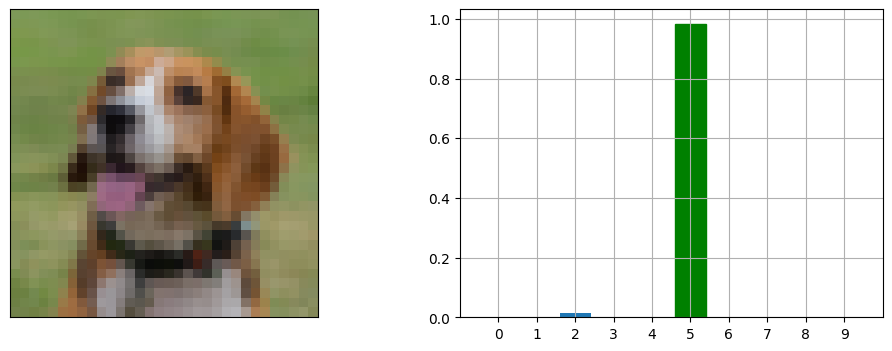

Prediction: dog


In [122]:
img = load_and_prepare_img('my_dog.jpg')
test_image(img)